Scipy:

We have the min and max temperatures in a city In India for each months of the year.

We would like to find a function to describe this and show it graphically, the dataset
given below.

Task:

1.fitting it to the periodic function

2.plot the fit

Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

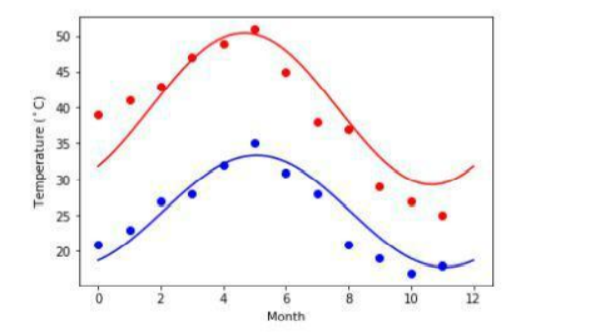

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

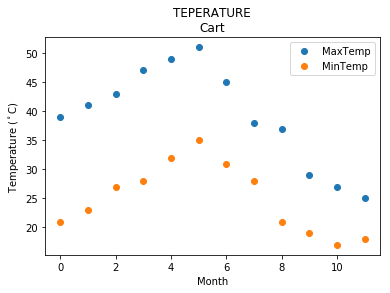

In [2]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]

Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
months = np.arange(12)
temp_max = np.array(Max)
temp_min = np.array(Min)
plt.plot(months,Max,'o',label='MaxTemp')
plt.plot(months,Min,'o',label='MinTemp')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.title('TEPERATURE\nCart')
plt.legend()

In [3]:
!pip install scipy 

In [4]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,temp_min, [-40, 20, 0])

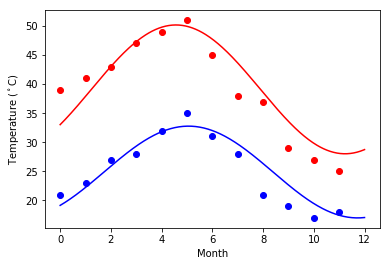

In [5]:


days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()



Matplotlib:

This assignment is for visualization using matplotlib:

data to use:

url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)

Charts to plot:

1. Create a pie chart presenting the male/female proportion

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [6]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'

titanic = pd.read_csv(url)

In [7]:
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


Text(0.5, 1.0, 'Male/Female proportion')

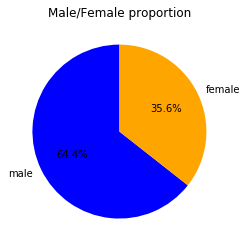

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
url=r'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url,skip_blank_lines=True)

count=titanic['sex'].value_counts()
colors = ['blue', 'orange']

plt.pie(count.values.tolist(), labels=count.index.values.tolist(), colors=colors,startangle=90,
        autopct='%.1f%%')
plt.title('Male/Female proportion')



Text(0.5, 1.0, 'Fare paid and the Age')

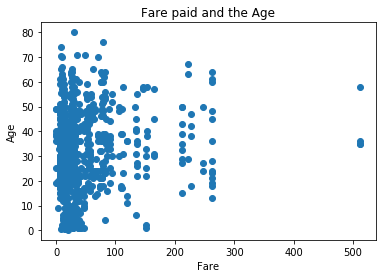

In [9]:
colors = {'male':'blue', 'female':'orange'}
plt.scatter(titanic.fare,titanic.age)
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Fare paid and the Age')

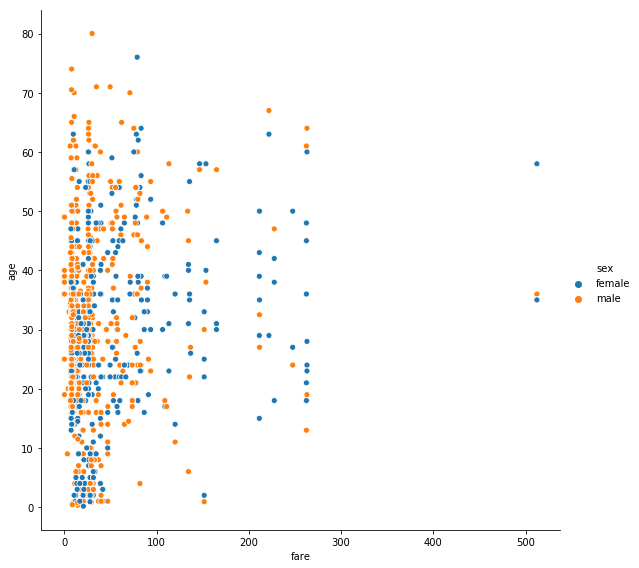

In [10]:
import seaborn as sns
sns.relplot(x='fare',y='age',data=titanic,hue='sex',height=8)

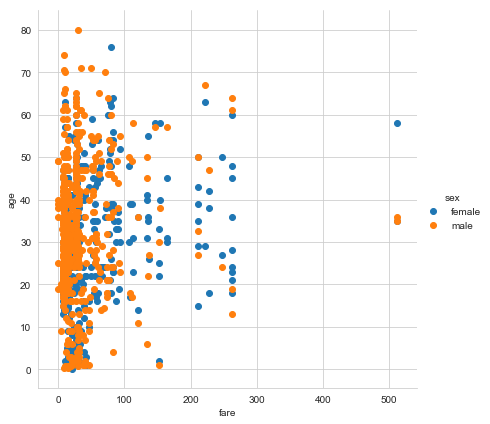

In [13]:
sns.set_style('whitegrid')
sns.FacetGrid(titanic , hue = 'sex' ,height=6)\
             .map(plt.scatter , 'fare' , 'age')\
.add_legend()
plt.show()